# Hotel booking EDA and booking cancellation prediction

# Background 

The data was collected in between 2015 and 2017 from a city hotel and a resort hotel both located in Porttugal however different cities. So we can assume that the varibles for both hotles are independent. And the value of this data set is for conducting researchs on  different factors that affect the hotel booking and booking cancellation. Especially to have a clear picture of what the most important factors are having respective impacts on city hotel and resort's booking cancellation  rate.



# Target 

EDA and booking cancellation prediction are formed two main parts of this data analysis report.  Based on database, we will  not only horizontally measure the correlation of different features, but also vertially compare different effects of varibles on city hotel and resort hotel. 

We will specifically look at the distribution of some important features such as the market segments, customer_type, avreage daily room rate per person etc. As hotel and resort  bookings are very seasonal, booking rate can be fluctuated,so another analysis precedure is to discover the peak month for each hotel and its booking rate and adr. 


Second part of this report is to train decision tree, knn and logsticClassifier models based on provided database, and see which model will perform better om predicting booking cancellation rate.  


# summary

In conclusion, two differnt hotels' prices are fucatuated during time of Months. On average resort's price are slightly lower than city hotel. One counter-intution discovery is that non refundable customers have higher booking cancelation rate than other deposit type customer, and city's cancel rate of refundable deposity is significantlly lower than resort. As the  elapse of lead time, both hotel's booking cancel rates are increaing.   

In [1]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('./hotel_bookings.csv')
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# data preprocessing , Null value detaction
 


In [2]:

null_rate = data.isna().sum()/data.shape[0]
null_sum = data.isna().sum()
null = pd.DataFrame(pd.concat([null_rate,null_sum],axis=1))
null.columns = ['null_rate','null']
null

,null_rate,null
hotel,0.000000,0
is_canceled,0.000000,0
lead_time,0.000000,0
arrival_date_year,0.000000,0
arrival_date_month,0.000000,0
arrival_date_week_number,0.000000,0
arrival_date_day_of_month,0.000000,0
stays_in_weekend_nights,0.000000,0
stays_in_week_nights,0.000000,0
adults,0.000000,0


Obviously company has large proportion of null values, however this should not be considered as missing value but an indicator of booking is not made by company, as well as agent's null value . 

In [3]:
# fill missing values of company and agent with 0 , '
data['company'].fillna(0,inplace=True)
data['agent'].fillna(0,inplace=True)
# fillna with unknow for country
data['country'].fillna('unknow',inplace=True)

data.dropna(how='any',inplace=True) 

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# 1. EDA 

The data will be splitted into hotel and resort respectively for the purpose of comparision. 
All categorical variables will be replace by numbers in order to know how these variables having impact on booking cancellation rate



In [5]:
print(data.dtypes[data.dtypes=='object'].index)
# keep the raw data for modeling, so I copied the original data
df = data.copy()
df['arrival_date_month'].unique()
df['arrival_date_month']= df['arrival_date_month'].map({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6})


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


In [6]:
# because customers are from 178 different countries, we keep the top 10 country and renamed other countries by oth 
other = df['country'].value_counts()[11:].index.tolist()
df['country'][df['country'].isin(other)]= 'oth'
df['country']= df['country'].map({'PRT':1,'oth':2,'GBR':3,'FRA':4,'ESP':5,'DEU':6,'ITA':7,'IRL':8,'BEL':9,'BRA':10,'NLD':11})
# apart from other country, the top 10 countries are mostly from European union,Porttugal is number one.

In [7]:
df['meal'].value_counts()
df['meal']= df['meal'].map({'BB':1,'HB':2,'SC':3,'Undefined':4,'FB':5})
# As market_segment and distribution_channel have similary values so we drop distribution channel, and drop assigned room
# also drop Reservation_status
df.drop(['distribution_channel','assigned_room_type','reservation_status'],axis=1,inplace=True)


In [8]:
df['market_segment'].value_counts()
df['market_segment']= df['market_segment'].map({'Online TA':1,'Offline TA/TO':2,'Groups':3,'Direct':4,'Corporate':5,'Complementary':6,'Aviation':7})
df['reserved_room_type'].unique()
df['reserved_room_type'] = df['reserved_room_type'].map({'A':1,'D':2,'E':3,'F':4,'G':5,'B':6,'C':7,'H':8,'P':9,'L':10})
df['customer_type']= df['customer_type'].map({'Transient':1,'Transient-Party':2,'Contract':3,'Group':4})
df['deposit_type'].unique()
df['deposit_type']= df['deposit_type'].map({'No Deposit':1,'Refundable':2,'Non Refund':3})

In [9]:
# separate the dataframe by city hotel and resort hotel 

city = df.loc[df['hotel']=='City Hotel'].drop('hotel',axis=1)
resort = df.loc[df['hotel']=='Resort Hotel'].drop('hotel',axis=1)

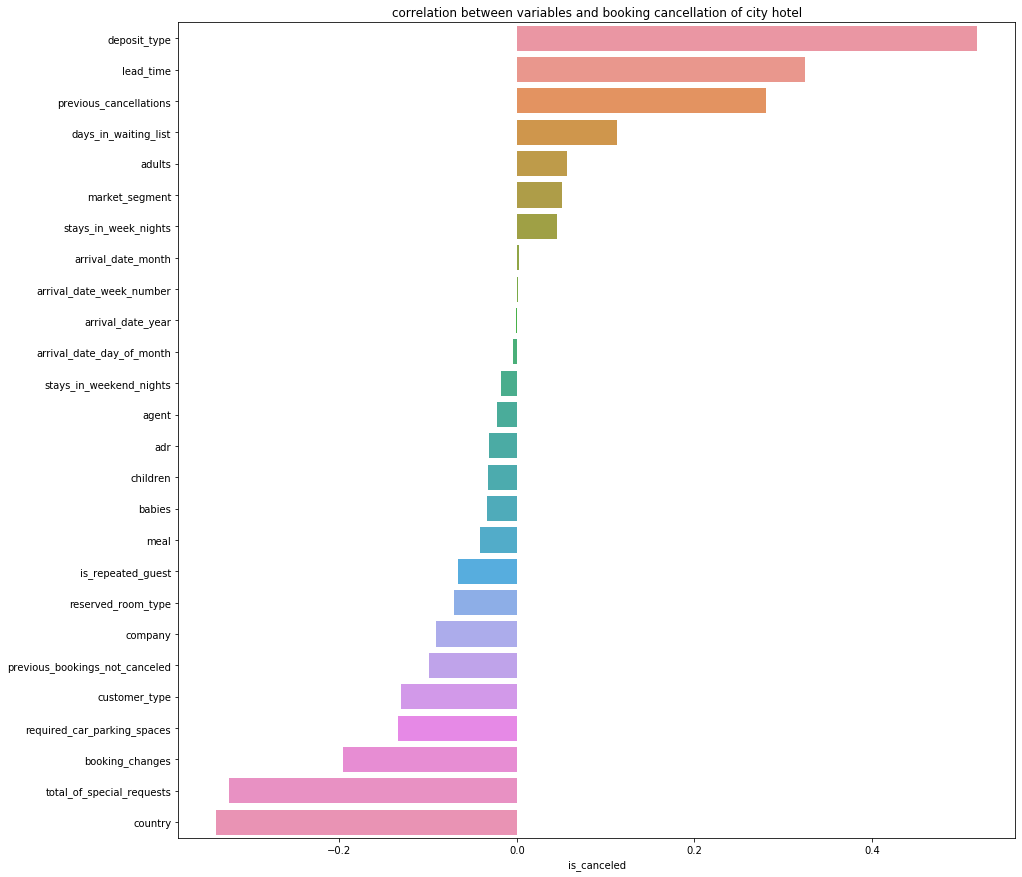

In [10]:
city_corr = city.corr(method='spearman').iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=city_corr[1:].index,x= city_corr[1:])
plt.title('correlation between variables and booking cancellation of city hotel')
plt.show()

It's not hard to tell that city hotel's cancellation rate are positively influenced by  deopsit_type, lead_time, previous_cancellations and  days in waiting list. In contrast, variables of country, total of speical requests, booking changes, require carpark reuqests are more likely to have negative impact on booking cancellation. Time to find out whether the same feather have similar correlation with booking cancellation of Resort hotel.

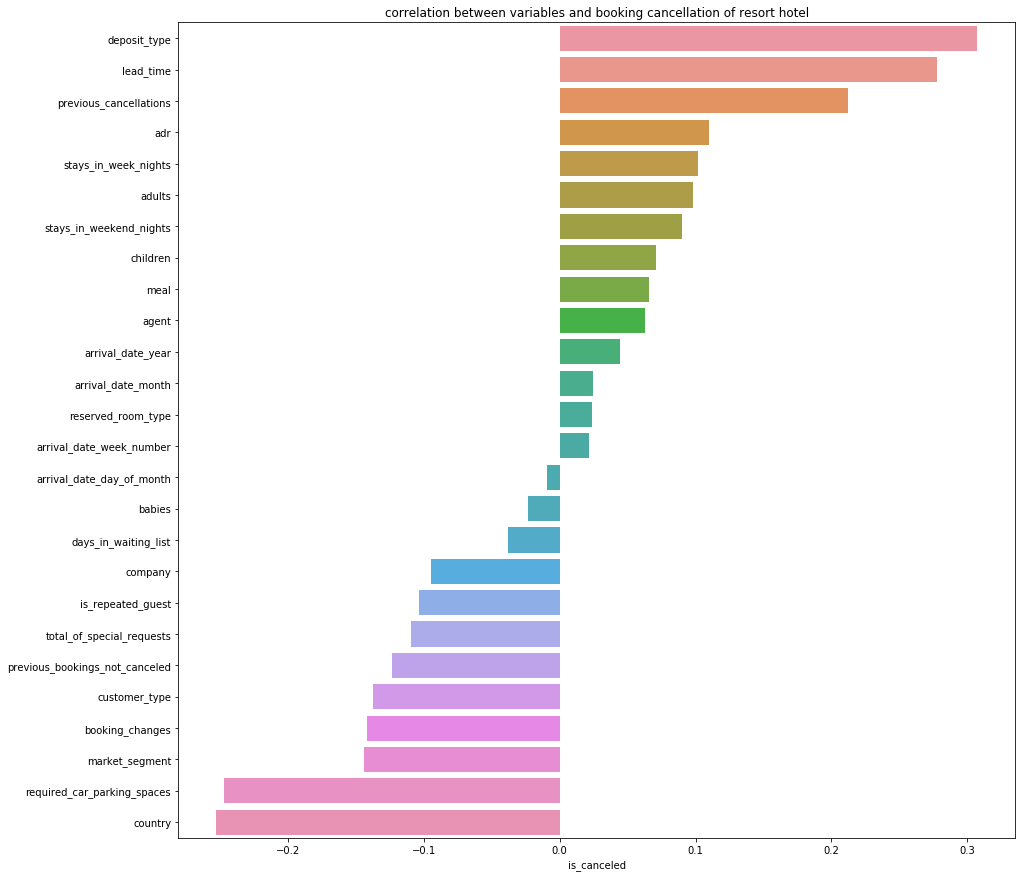

In [11]:
resort_corr = resort.corr(method='spearman').iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=resort_corr[1:].index,x=resort_corr[1:])
plt.title('correlation between variables and booking cancellation of resort hotel')
plt.show()


Compare with city hotel, features that affect booking concellation of both hotels are almost identical, however market segment has opposite effects on both city and resort hotel,  we can infer that customers who made booking thourgh different distributions will result in different booking rate of Resort hotel. Other variables like children, meal,agent,company,and repeated guests are more correlated with Resort hotel than city hotel. 



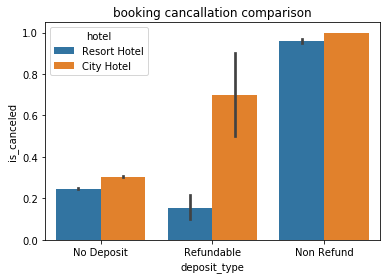

In [12]:
# market segmentations for two different hotels
sns.barplot(x=data['deposit_type'],y=data['is_canceled'],hue=data['hotel'])
plt.title('booking cancallation comparison')
plt.show()



After comparision, it is bit odd that both hotels have high rate of cancellation for non refund customers . Probably there is a data error when extracing data from server . 

Text(0.5, 1, 'Resort Hotel market segmentation')

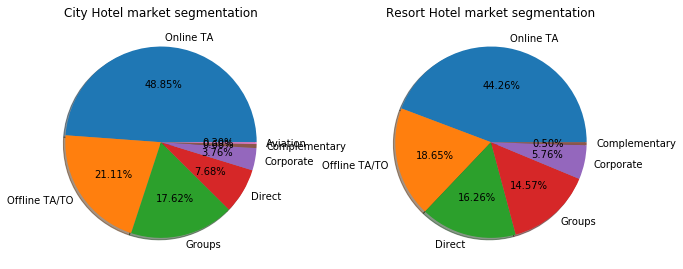

In [13]:
# market segment distribution 
city_segment = data['market_segment'][data['hotel']=='City Hotel'].value_counts()
resort_segment = data['market_segment'][data['hotel']=='Resort Hotel'].value_counts()
# plt.subplot(1,2,1)


fig,(ax1,ax2)= plt.subplots(1,2,)
fig.set_size_inches(10,10)
fig.tight_layout(pad=6)
ax1.pie(city_segment.values,labels= city_segment.index.tolist(),autopct='%0.2f%%',shadow=True,rotatelabels=0)
ax1.set_title('City Hotel market segmentation')


ax2.pie(resort_segment.values,labels= resort_segment.index.tolist(),autopct='%0.2f%%',shadow=True,rotatelabels=0)
ax2.set_title('Resort Hotel market segmentation')



Both hotels have similary ratios of market segments 

Text(0.5, 1, 'Resort hotel customer type')

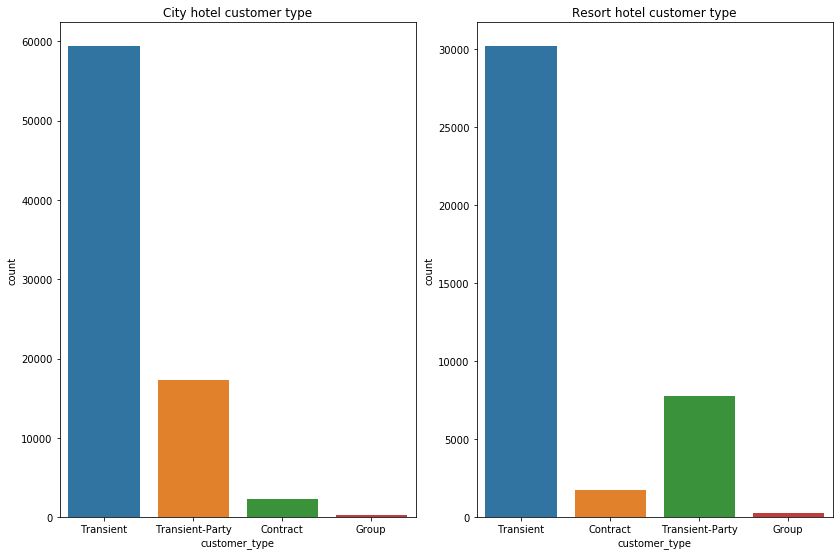

In [14]:
# customer type of each hotel  
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,8)
fig.tight_layout(pad=3)
sns.countplot(data['customer_type'][data['hotel']=='City Hotel'],ax=ax[0])
sns.countplot(data['customer_type'][data['hotel']=='Resort Hotel'],ax=ax[1])
ax[0].set_title('City hotel customer type')
ax[1].set_title('Resort hotel customer type')

Transient customers are taking the largest propotion of customer types for both hotels 
In terms of previous correlation bar charts of two different hotels, adr have higher correlation with resort hotel. 
Another comparision charts demonstrate the distributions of average daily rate of each person for   

Text(0.5, 1, 'Resort Hotel guest geo distribution')

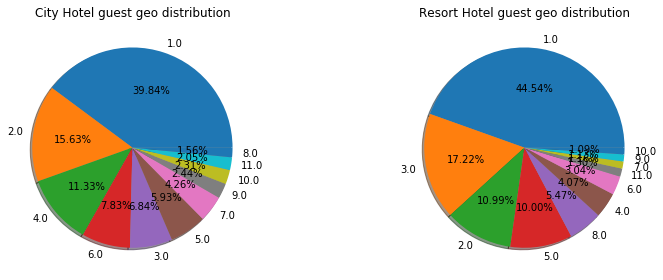

In [39]:
# According to previous research, guests' geographic distribution can lead to a volatile room price 
city_country= city['country'].value_counts()
resort_country = resort['country'].value_counts()

fig,ax = plt.subplots(1,2)
fig.tight_layout(pad=4)
fig.set_size_inches(12,8)
ax[0].pie(city_country.values,labels=city_country.index.tolist(),autopct='%0.2f%%',shadow=True)
ax[1].pie(resort_country.values,labels=resort_country.index.tolist(),autopct='%0.2f%%',shadow=True)
ax[0].set_title('City Hotel guest geo distribution')
ax[1].set_title('Resort Hotel guest geo distribution')


'PRT':1,'other country':2,'GBR':3,'FRA':4,'ESP':5,'DEU':6,'ITA':7,'IRL':8,'BEL':9,'BRA':10,'NLD':11

Resort hotel and city hotel have different visitor's geographic distributions. As we see, city hotle's guest are more evenly distributed. 




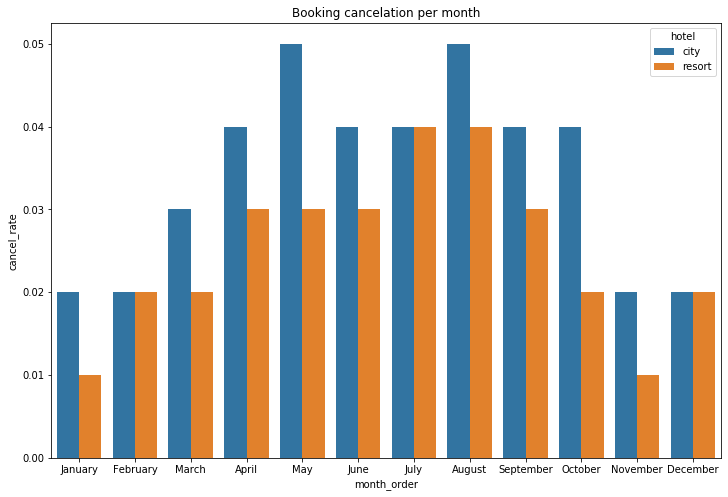

In [16]:
# find out which month has the highest cancel rate
cancel_month = data[['is_canceled','arrival_date_month','hotel']]
city_month = cancel_month[cancel_month['hotel']=='City Hotel']
resort_month = cancel_month[cancel_month['hotel']=='Resort Hotel']
city_cm = round(city_month.groupby('arrival_date_month')['is_canceled'].sum()/city_month.shape[0],2)
resort_cm= round(resort_month.groupby('arrival_date_month')['is_canceled'].sum()/resort_month.shape[0],2)
city_cancel = pd.DataFrame({'hotel':'city','month':city_cm.index.tolist(),'cancel_rate':city_cm.values.tolist()})
resort_cancel = pd.DataFrame({'hotel':'resort','month':resort_cm.index.tolist(),'cancel_rate':resort_cm.values.tolist()})
RC = pd.concat([city_cancel,resort_cancel],ignore_index=True)
order_month=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 
             'September', 'October', 'November', 'December']
RC['month_order'] = pd.Categorical(RC['month'],categories=order_month,ordered=True)
plt.figure(figsize=(12,8))
sns.barplot(x='month_order',y='cancel_rate',hue='hotel',data=RC)
plt.title('Booking cancelation per month')
plt.show()          

City hotel shows higher cancel rate, and the highest of booking cancel rate is between May and Augest.   

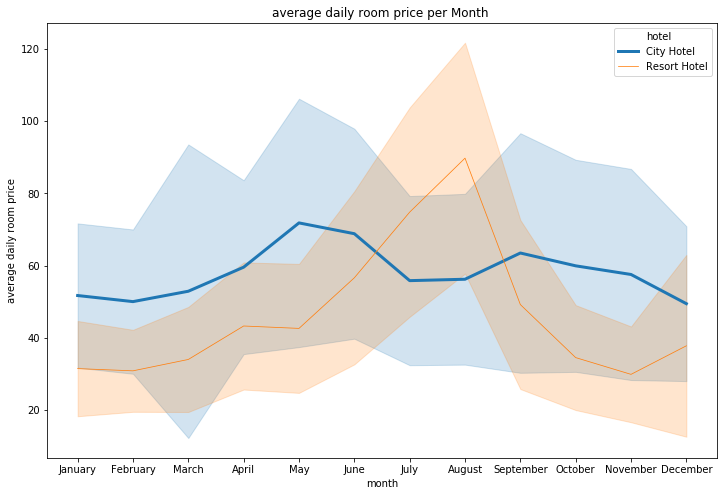

In [17]:
# average daily rate per person over each year 
# in order to caculate adr per person, make sure denomiator is not zero 
copy_data= data[~(data['adults']==0)&(data['children']==0)]
copy_data['adr_pp']=copy_data['adr']/(copy_data['adults']+copy_data['children'])
avg_adr_month= copy_data[['adr_pp','arrival_date_month','hotel']].sort_values('arrival_date_month')
 

avg_adr_month['month']= pd.Categorical(avg_adr_month['arrival_date_month'],categories=order_month,ordered=True)
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y="adr_pp", hue="hotel", data=avg_adr_month,ci='sd',size='hotel')
plt.ylabel('average daily room price')
plt.title('average daily room price per Month ')
plt.show()

Over all , city hotel 's room prices are averagely more expensive and the standard deviation of price is bigger but in busy month resort are more expensive than city Hotel. This is understandable becuase  peopel tend to travel in July and Aug. 

    
    

Text(0.5, 69.0, 'lead time')

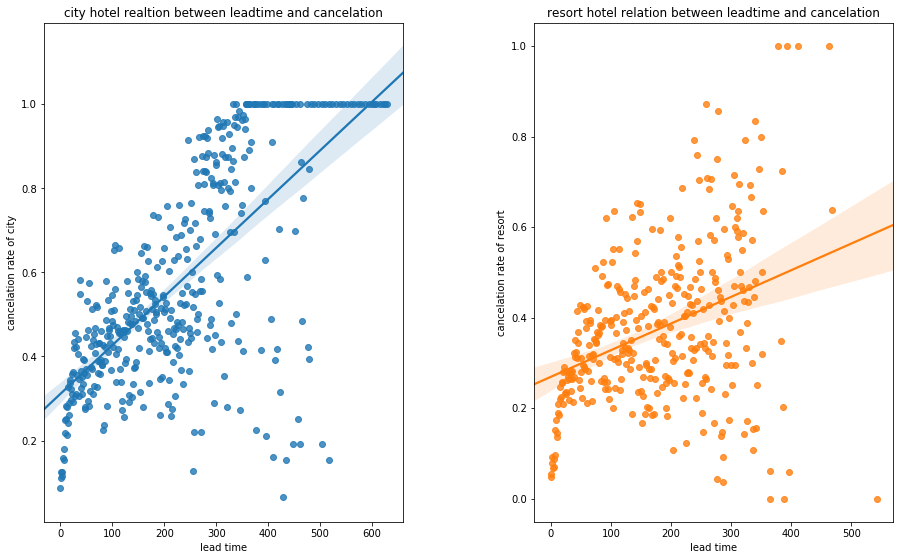

In [38]:
# From the correlation graph, lead time has a very strong correlation with both hotels's booking cancellation

lead_time_city = city.groupby('lead_time')['is_canceled'].describe()
lead_time_resort = resort.groupby('lead_time')['is_canceled'].describe()
lead_time_city_10 = lead_time_city[lead_time_city['count']>10]
lead_time_resort_10 = lead_time_resort[lead_time_resort['count']>10]
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,10)
fig.tight_layout(pad= 10)
sns.regplot(x=lead_time_city_10.index.tolist(),y='mean',data=lead_time_city_10,ax=ax1,x_ci='sd')
sns.regplot(x=lead_time_resort_10.index.tolist(),y=lead_time_resort_10['mean'],ax=ax2,x_ci='sd')
ax1.set_title('city hotel realtion between leadtime and cancelation')
ax2.set_title('resort hotel relation between leadtime and cancelation')
ax1.set_ylabel('cancelation rate of city')
ax1.set_xlabel('lead time')
ax2.set_ylabel('cancelation rate of resort')
ax2.set_xlabel('lead time')

while leading time increasing , city hotel's cancelation rate increasing as well, on the other hand resort's cancelation rate doesn't increasing as much as lead time. 

# 2. Model prediction 
KnearestNeighbors decision tree and logicRegression will be used to predict booking cancellation rate. And 


In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score


# Before doing any preprocessing , find out how each model's performance 
X=data.drop(['is_canceled','reservation_status'],axis=1)
y=data['is_canceled']

category_variable = X.dtypes[data.dtypes=='object'].index.tolist()
# instead of using train test split, kfold 
kfold= KFold(n_splits=4,shuffle=True,random_state=21)
categorical_transformer = Pipeline(steps=[('one hot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('category',categorical_transformer,category_variable)])
model_name = [('Knn',KNeighborsClassifier(n_neighbors=10,weights='distance')),
              ('decision tree',DecisionTreeClassifier(random_state=0)),
              ('Logistic',LogisticRegression(solver='lbfgs',multi_class='multinomial'))]

for name,model in model_name:
    model_fit= Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
    cv = cross_validate(model_fit,X,y,cv=kfold,scoring='accuracy',n_jobs=-1)

    print(f'model name:{name} cross validation score: {cv} ')
    
    

model name:Knn cross validation score: {'fit_time': array([0.37499642, 0.28124595, 0.36601806, 0.3051827 ]), 'score_time': array([521.23034239, 510.03928995, 515.77992511, 533.98819733]), 'test_score': array([0.85824371, 0.8574061 , 0.85679823, 0.85579307])} 
model name:decision tree cross validation score: {'fit_time': array([12.06571221, 12.2262795 , 12.37887239, 12.9573245 ]), 'score_time': array([0.10272479, 0.10172844, 0.08178139, 0.08277869]), 'test_score': array([0.86896506, 0.86447549, 0.86011526, 0.86236012])} 
model name:Logistic cross validation score: {'fit_time': array([3.44976735, 3.28620553, 3.33108521, 3.38693762]), 'score_time': array([0.07679486, 0.10571837, 0.1216743 , 0.07978773]), 'test_score': array([0.82226019, 0.82035045, 0.82258929, 0.82131609])} 


Based on accuracy score, decision tree achieved the best score which is 0.8689, and Knearest neighbors made the second best good score. Although Logistic regression's score is the lowest , it take the shorest time to fit the data. Scores between 0.8 to 0.9 indicates the model fit data very well, it almost capatures the majority patterns of data. 



# 3. Features analysis
To analysis top few weighted features, use eli5 to explain the models' 

In [20]:
tree = DecisionTreeClassifier(random_state=0)

tree_fit= Pipeline(steps=[('preprocessor',preprocessor),('tree',tree)])
tree_fit.fit(X,y)
predict = tree_fit.predict(X)


Extract the feartures name from one hot encoder, and combin with numerical features list , and use ile5 to explain the weight of each features 

In [21]:
onehot_list= list(tree_fit.named_steps['preprocessor'].named_transformers_['category'].named_steps['one hot'].get_feature_names(input_features=category_variable))
num_list = list(X.dtypes[X.dtypes!='object'].index)
features_list= onehot_list


In [22]:
import eli5

eli5.formatters.as_dataframe.explain_weights_df(tree_fit.named_steps['tree'],feature_names=features_list)[:10]


,feature,weight
0,deposit_type_Non Refund,0.239415
1,country_PRT,0.050410
2,market_segment_Online TA,0.031214
3,distribution_channel_TA/TO,0.017480
4,assigned_room_type_A,0.016688
5,reserved_room_type_A,0.013363
6,customer_type_Transient,0.010460
7,arrival_date_month_February,0.006951
8,arrival_date_month_January,0.006126
9,arrival_date_month_August,0.005564


Deposit type, country, plays important roles in prediction model, whereas it is bit weird that top weight features is deposit type but lead time is the most correlated vairable of booking cancellation rate. Finally this issues is identified that numerical features is not taken into account by models. 

In order to optimise the model, there are couple of ways to do so, train data spearately by hotel categorises, and select features by RFE model. 
